## MSDE621 - Week 3 Assignment

For this week, we will be retrieving the data from a PDF, much like we did in Use Case 1 in the FTE for this week. (located in the assign3_data folder on WorldClass). You will find three PDFs inside this folder:
* CustomerSurvey_blank.pdf - blank copy of a Customer Satification Survey
* CustomerSurvey_completed.pdf - 50 completed surveys 
* CustomeSurvey_large.pdf - 200 completed surveys (for the Bonus Option)


### Assignment Requirements:
You will need to retreive the customer inputs from one of the two PDFs containing completed surveys and write the data into a CSV.  <br>
Please keep the following requirements in mind as you work through this assignment:

1. Functions are your friends!  
2. You may not use a dataframe within this assignment.  Think lists and dictionaries.
3. Your CSV header row should match:
   * id|Q1|Q2|Q3|Q4|Q5|Q6|Q7|Q8|Q9|Q10|Q11|Q12
4. CSV field definition:
   * id - unique index for each survey (numeric)
   * Q1 - numeric value matching customer input
   * Q2 - string matching customer input
   * Q3 - string matching customer input
   * Q4 - list of strings, seperated by ':' matching all of the customer inputs for this question
   * Q5 - numeric value matching customer input
   * Q6 - numeric value matching customer input
   * Q7 - numeric value matching customer input
   * Q8 - string matching customer input
   * Q9 - string matching customer input
   * Q10 - string matching customer input
   * Q11 - string matching customer input
   * Q12 - string matching customer input
5. Within CustomerSurvey_completed.pdf, you can assume the only Q4 has multiple responses and all questions have a response.
6. If you decide to challenge yourself work with CustomeSurvey_large.pdf, you can not safely assume that all questions have a response and that only Q4 has multiple. This means that you will need to have some error handling in place. 
7. You must keep the first page and the second page for the same survey together. No mixing results across the surveys.

#### You might be assking yourself "Why would I decide to work with the more challenging file?"  The answer is simple...  It's worth more points...  50% more points in fact.   So, you can earn upto 15 out of 10 points for taking this option.  
If you decide to take this option, there are a complete of items I would like to see you note in your code.
1. Your very first cell, very first line should read "Bonus Option Selected") - make this big, so I see it!
2. Some where in your notebook, you need to output when your code detects a "special scenario" and display how you are handling this.
3. If the customer has selected multiple values for Q1,Q2,Q4-Q12, then you need to reduce their input to only one choice. You get to decide if you take the higher of two values or the lower.  just be consistent across the board, with the following special conditions:
   * If the input is lower than the possible values, than use the lowest value.  See the example below about inventing a value.   In this case you would return a 1 and not the -1.
   * Same goes for a value that is higher than the highest possible value.  Here' you'd return the highest value.

4. If the customer doesn't answer a question, than return a 'nan' for that input.


Possible Special Scenarios:: 
* Not answering a question
* Selecting multiple values for Q2,Q4,Q8-Q11
* Customer invents a value for Q1,Q5-Q7<br>
<img align="left" style="padding-right:10px;" src="assign3_data/invent_value.png" ><br>

<div class="alert alert-block alert-info">
<b>Helpful Hint::</b> Start small!  Work with only one completed survey while developing your code and then increase the total number of PDFs as you go. (Splitting the file I give you might be useful)
</div>

<div class="alert alert-block alert-danger">
<b>Important::</b> Running all PDFs through your code will be a time consuming process. 
I highly recommend you have some way of telling if your process is progressing or stuck somewhere.
</div>

### What to turn in:
Please submit your well organized and documented Jupyter notebook and your CSV output file.

In [4]:
from PyPDF2 import PdfFileReader, PdfFileWriter,PdfFileMerger
from wand.image import Image as Img
import PIL.Image
from glob import glob
import pytesseract
import os
import deco

In [5]:
pdfFileObj = open('assign3_data/CustomerSurvey_completed.pdf', 'rb') 

In [6]:
pdfReader = PdfFileReader(pdfFileObj) 

In [7]:
print(pdfReader.numPages) 

100


In [8]:
infile = 'CustomerSurvey_blank.pdf'
outfile = 'CustomerSurvey_blank.jpg'

base_dir = './assign3_data/'

blank_infile = base_dir + infile
blank_outfile = base_dir + outfile


In [9]:
with Img(filename = blank_infile, resolution=300) as img:
    img.compression_quality = 99
    img.save(filename=blank_outfile)

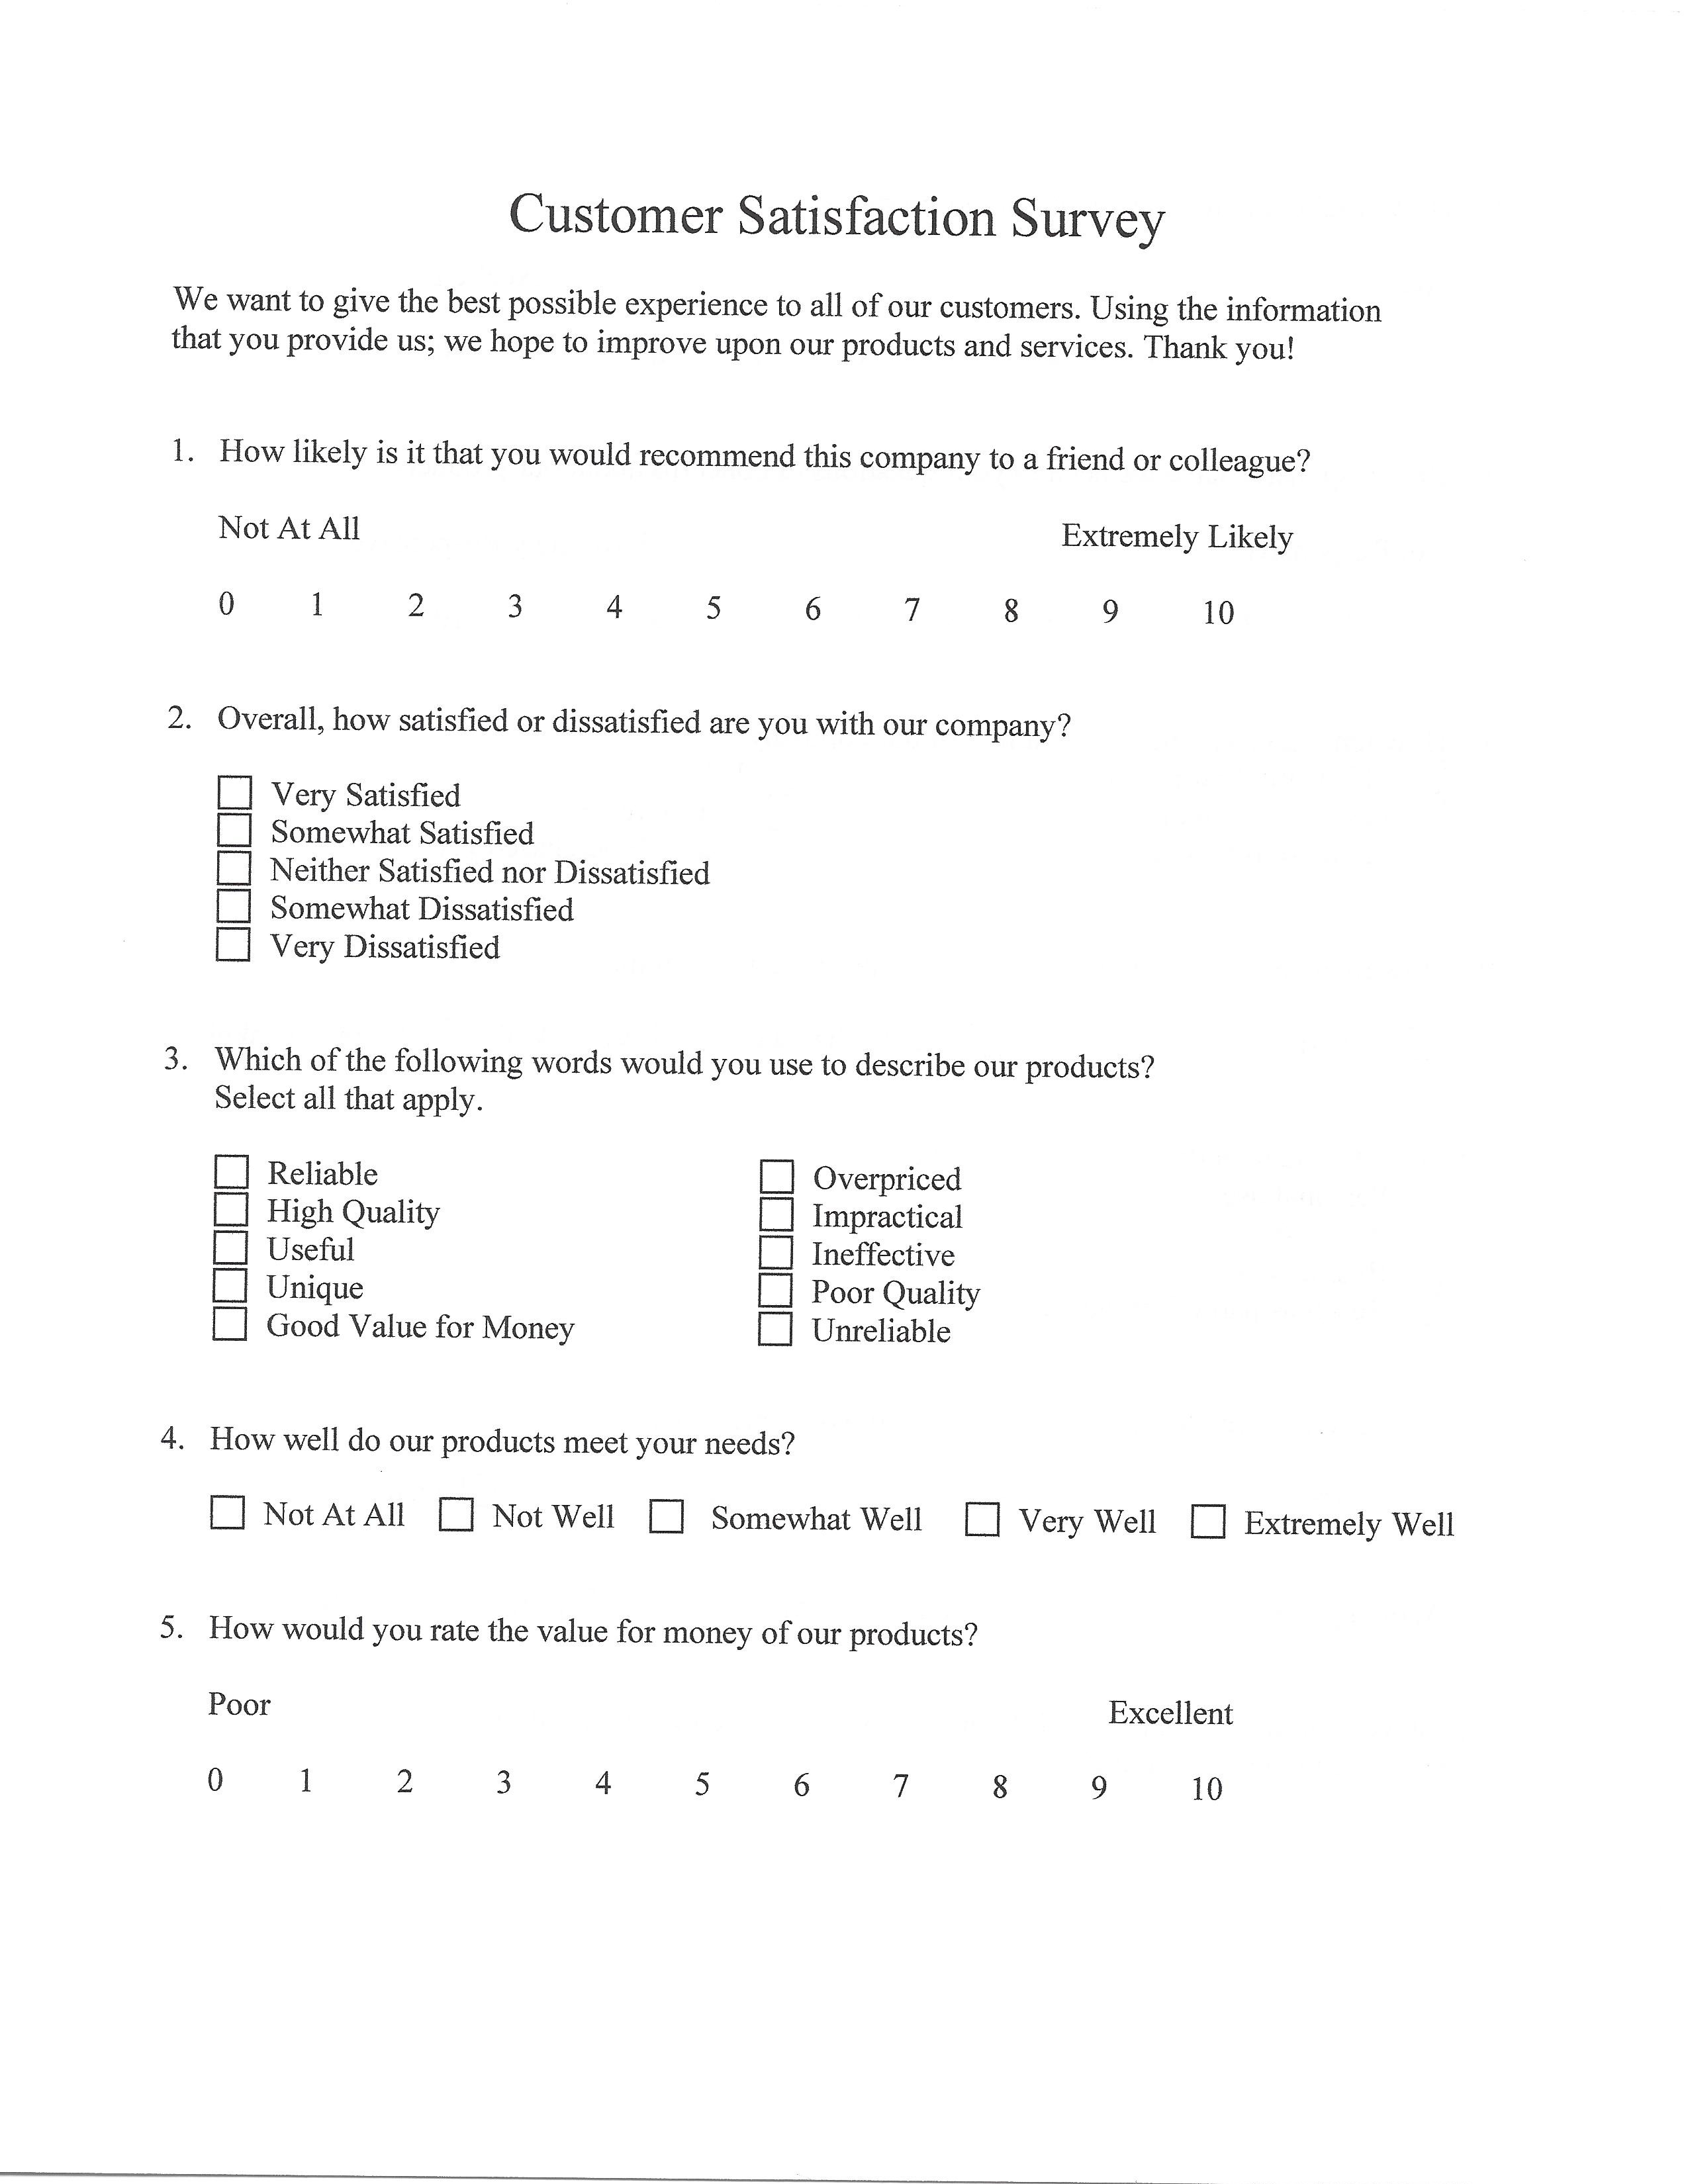

In [11]:
from IPython.display import Image
blank_image1 = base_dir + 'CustomerSurvey_blank-0.jpg'
blank_image2 = base_dir + 'CustomerSurvey_blank-1.jpg'

Image(filename = blank_image1)

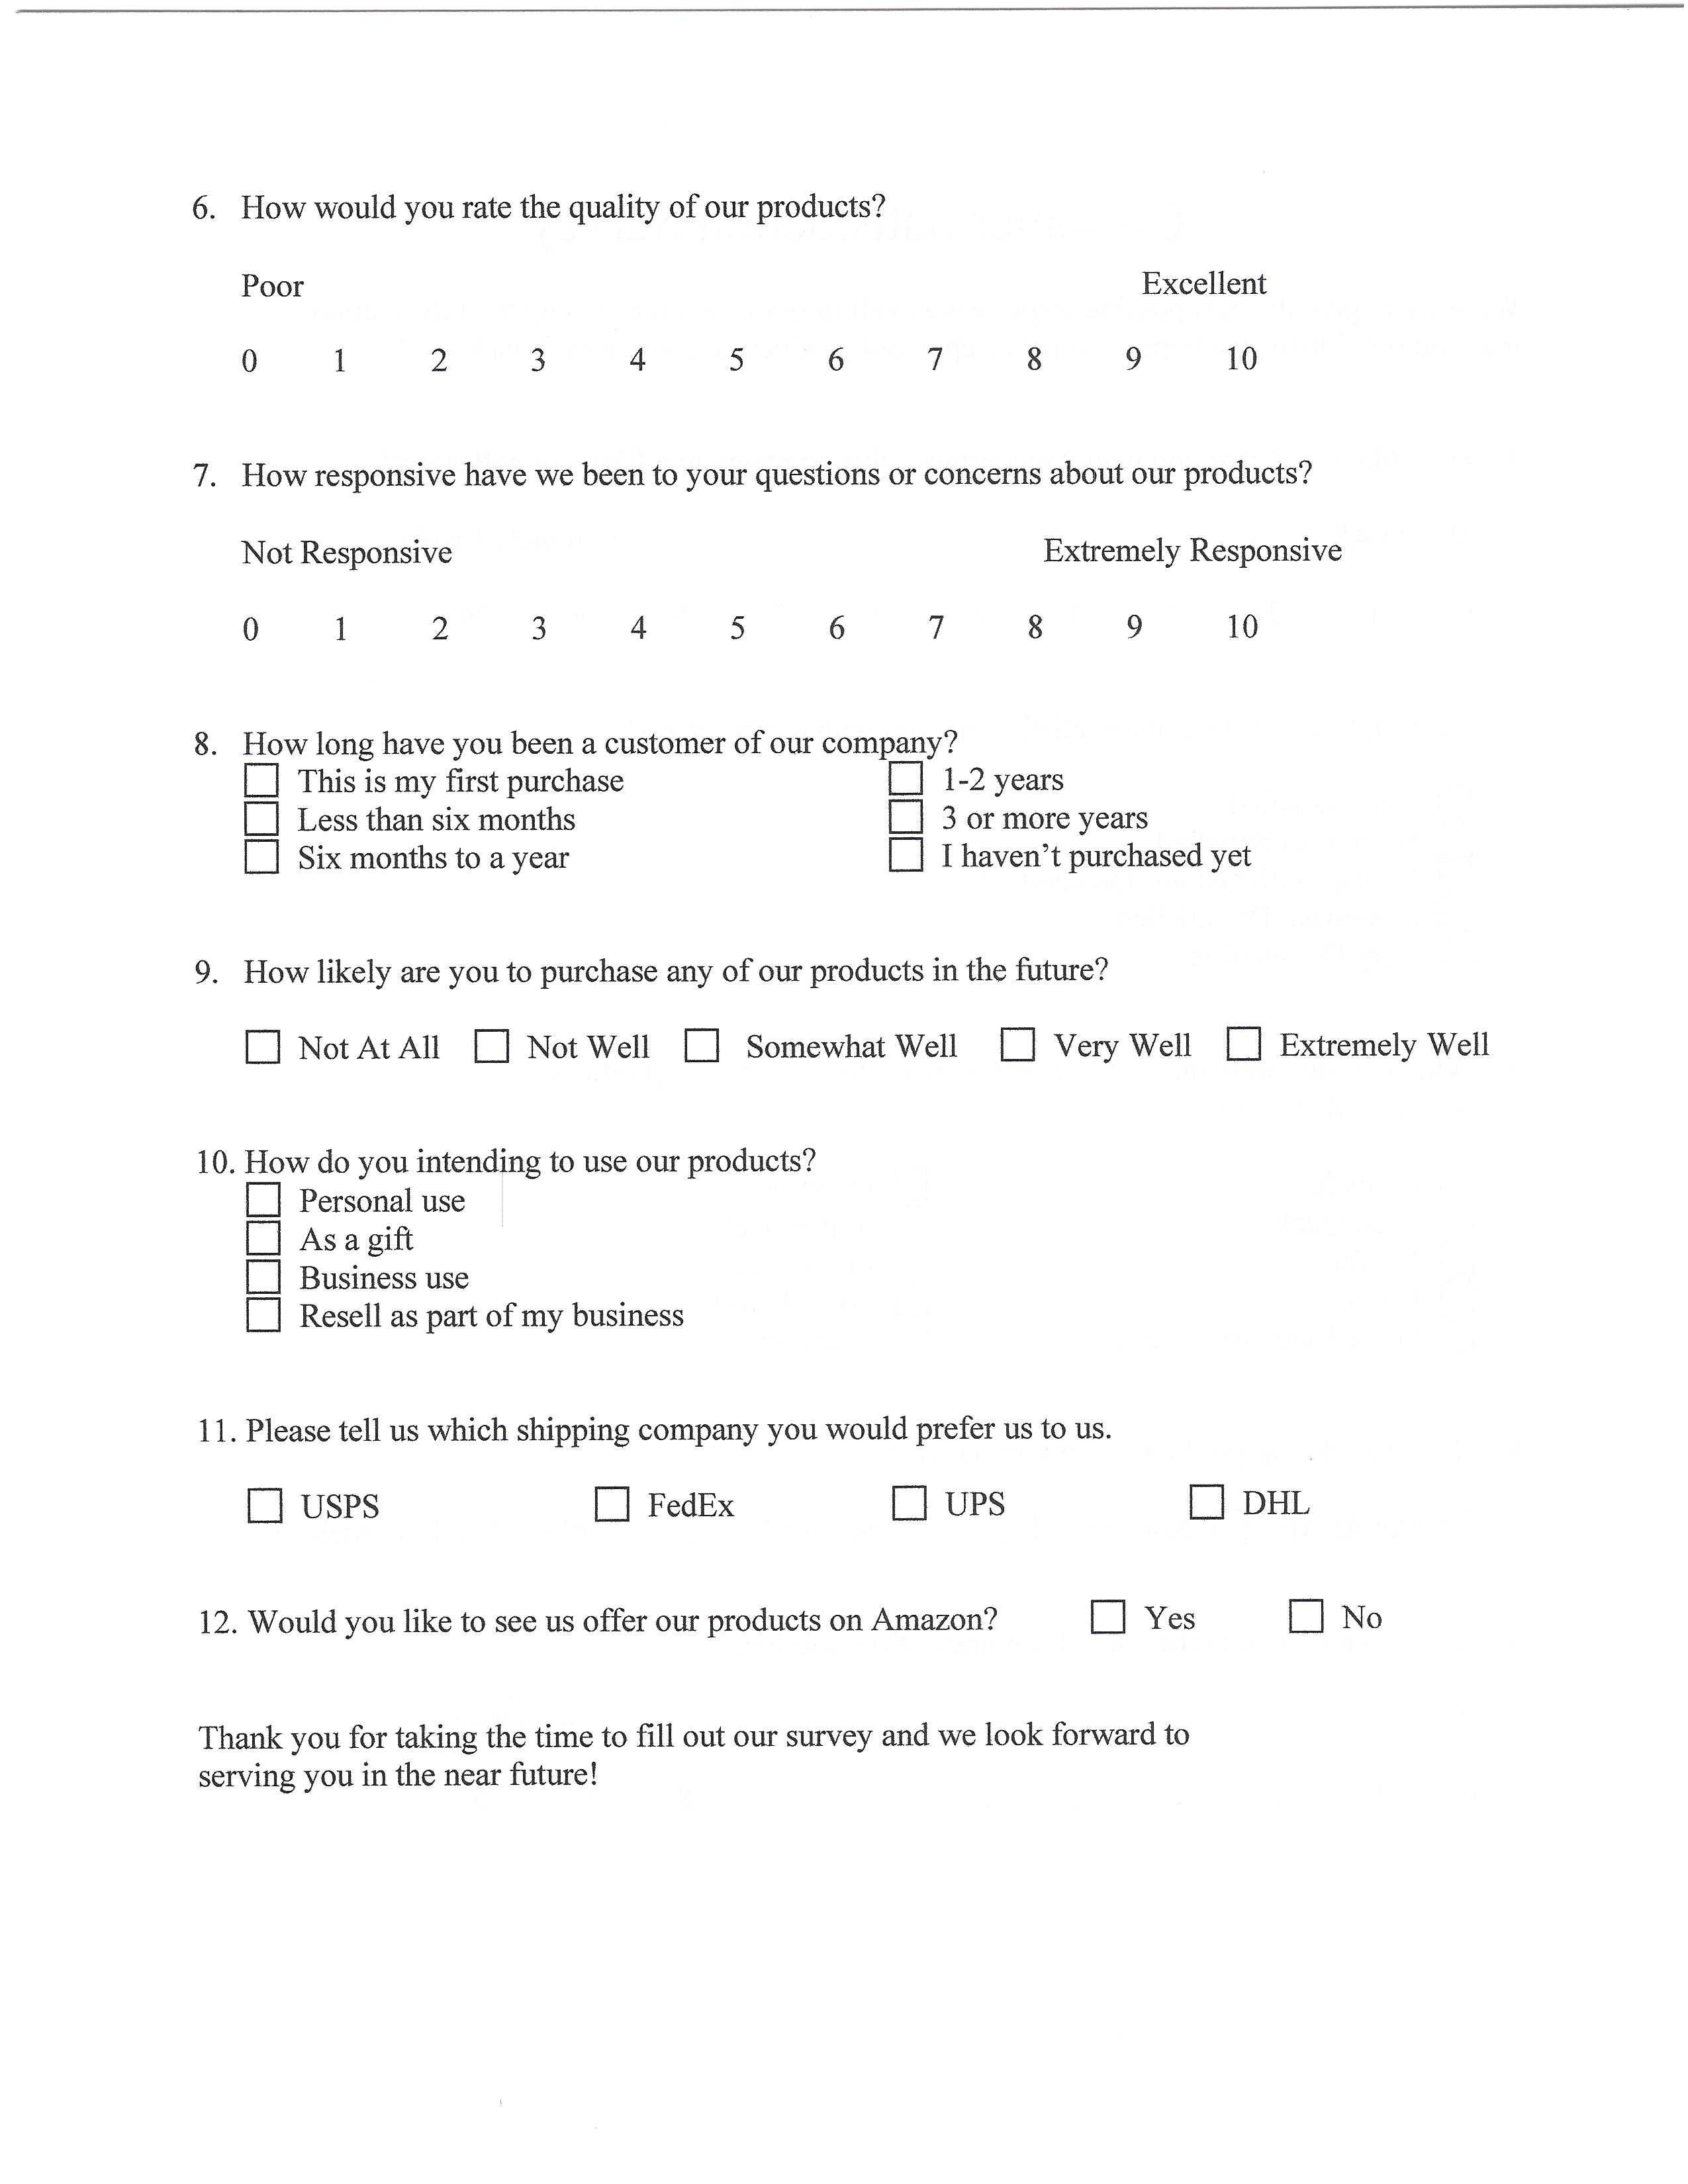

In [8]:
Image(filename = blank_image2)

In [12]:
text = pytesseract.image_to_string(PIL.Image.open(blank_image2))
text.split('\n')

['6. How would you rate the quality of our products?',
 '',
 'Poor Excellent',
 '',
 '0 1 2 3 4 5 6 7 8 9 10',
 '',
 '7. How responsive have we been to your questions or concerns about our products?',
 'Not Responsive Extremely Responsive',
 '',
 '0 1 2 3 4 5 6 7 8 9 10',
 '',
 '8. How long have you been a customer of our company?',
 '',
 '[_] This is my first purchase [-] 1-2 years',
 '[_] Less than six months [_] 3 or more years',
 '[_] Six months to a year [_] I haven’t purchased yet',
 '',
 '9. How likely are you to purchase any of our products in the future?',
 '',
 '[-] Not At All [_] Not Well [-] Somewhat Well [] Very Well [| Extremely Well',
 '',
 '10. How do you intending to use our products?',
 '[_] Personal use',
 '[] Asa gift',
 '[ |] Business use',
 '[_] Resell as part of my business',
 '',
 '11. Please tell us which shipping company you would prefer us to us.',
 '',
 '[ ] USPS [ ] FedEx [] UPS [_] DHL',
 '',
 "12. Would you like to see us offer our products on Amazon? [']

In [13]:
infile = 'CustomerSurvey_completed.pdf'
outfile = 'CustomerSurvey_completed.jpg'

base_dir = './assign3_data/'

filled_infile = base_dir + infile
filled_outfile = base_dir + outfile

with Img(filename = filled_infile, resolution=300) as img:
    img.compression_quality = 99
    img.save(filename = filled_outfile)

In [18]:
pdf_list = [f for f in sorted(glob('./assign3_data/*completed-*.jpg'))]

In [20]:
#Renaming file names so that digits contain two digits
for x in pdf_list:
    replacelist = []
    newfile = x.split('-')
    if len(newfile[1]) == 5:
        replace =newfile[1].rjust(6,'0')
        new = newfile[0] + replace
        new = new.replace('completed','completed-')
        os.rename(x,new)      

In [19]:
pdf_list = [f for f in sorted(glob('./assign3_data/*completed-*.jpg'))]

In [20]:
pdf_list[0]

'./assign3_data/CustomerSurvey_completed-0.jpg'

In [21]:
blank_text1 = pytesseract.image_to_string(PIL.Image.open(blank_image1))

In [22]:
blank_text2 = pytesseract.image_to_string(PIL.Image.open(blank_image2))

In [23]:
blank_text1 = blank_text1.split('\n')
blank_text1 = [x for x in blank_text1 if x != '']

In [24]:
blank_text1

['Customer Satisfaction Survey',
 'We want to give the best possible experience to all of our customers. Using the information',
 'that you provide us; we hope to improve upon our products and services. Thank you!',
 '1. How likely is it that you would recommend this company to a friend or colleague?',
 'Not At All Extremely Likely',
 '0 1 2 3 4 5 6 7 8 9 10',
 '2. Overall, how satisfied or dissatisfied are you with our company?',
 '[-] Very Satisfied',
 '[_] Somewhat Satisfied',
 '[_] Neither Satisfied nor Dissatisfied',
 '[-] Somewhat Dissatisfied',
 '[_] Very Dissatisfied',
 '3. Which of the following words would you use to describe our products?',
 'Select all that apply.',
 '[| Reliable [_] Overpriced',
 '[_] High Quality [_] Impractical',
 '["] Useful [] Ineffective',
 '[ ] Unique [-] Poor Quality',
 '[_] Good Value for Money [-] Unreliable',
 '4. How well do our products meet your needs?',
 '[-] Not At All [-] Not Well [-] Somewhat Well [ ] Very Well [_] Extremely Well',
 '5. Ho

In [ ]:
@deco.concurrent
def process_jpg(input_name):
    text = None
    output_name = input_name.replace('jpg','txt')
    text = pytesseract.image_to_string(Image.open(input_name))
    text = text.split('\n')
    text = [x for x in text if x != '']
    try:
        with open(output_name, 'w') as outfile:
            outfile.write('\n'.join(infile))
    except IOError as ioe:
        return 'Fail: ' + outputfile_name
    return 'Pass: ' + output_name

In [ ]:
@deco.synchronized
def convert_all(jpg_list):
    results = {}
    for file in jpg_list:
        results[file] = process_jpg(file)
    return results

In [ ]:
%%time
convert_results = convert_all(pdf_list)

In [ ]:
for k, v in convert_results.items():
    if "Pass:" not in convert_results[k]:
        print(v)
                                      

In [25]:
len(pdf_list[0]), pdf_list[0]

(45, './assign3_data/CustomerSurvey_completed-0.jpg')

In [26]:
complete_0 = pytesseract.image_to_string(PIL.Image.open(pdf_list[0])).split('\n')
complete_0 = [x for x in complete_0 if x != '']

In [27]:
complete_0

['Customer Satisfaction Survey',
 'We want to give the best possible experience to all of our customers. Using the information',
 'that you provide us; we hope to improve upon our products and services. Thank you!',
 '1. How likely is it that you would recommend this company to a friend or colleague?',
 'Not At All Extremely Likely',
 'oO 1 4% 3 4 5 6 7 8 9 10',
 '2. Overall, how satisfied or dissatisfied are you with our company?',
 '[_] Very Satisfied',
 '[_] Somewhat Satisfied',
 '[_] Neither Satisfied nor Dissatisfied',
 '= Somewhat Dissatisfied',
 'Wh',
 'Very Dissatisfied',
 '3. ich of the following words would you use to describe our products?',
 'Select all that apply.',
 '[_] Reliable [X] Overpriced',
 '[_] High Quality 4] Impractical',
 '[ ] Useful Ineffective',
 '[-] Unique Poor Quality',
 '[_] Good Value for Money [X] Unreliable',
 '4. How well do our products meet your needs?',
 'NJ Not At All [[] Not Well [] Somewhat Well [[] Very Well [[] Extremely Well',
 '5. How would 

In [91]:
from IPython.display import Image as dis

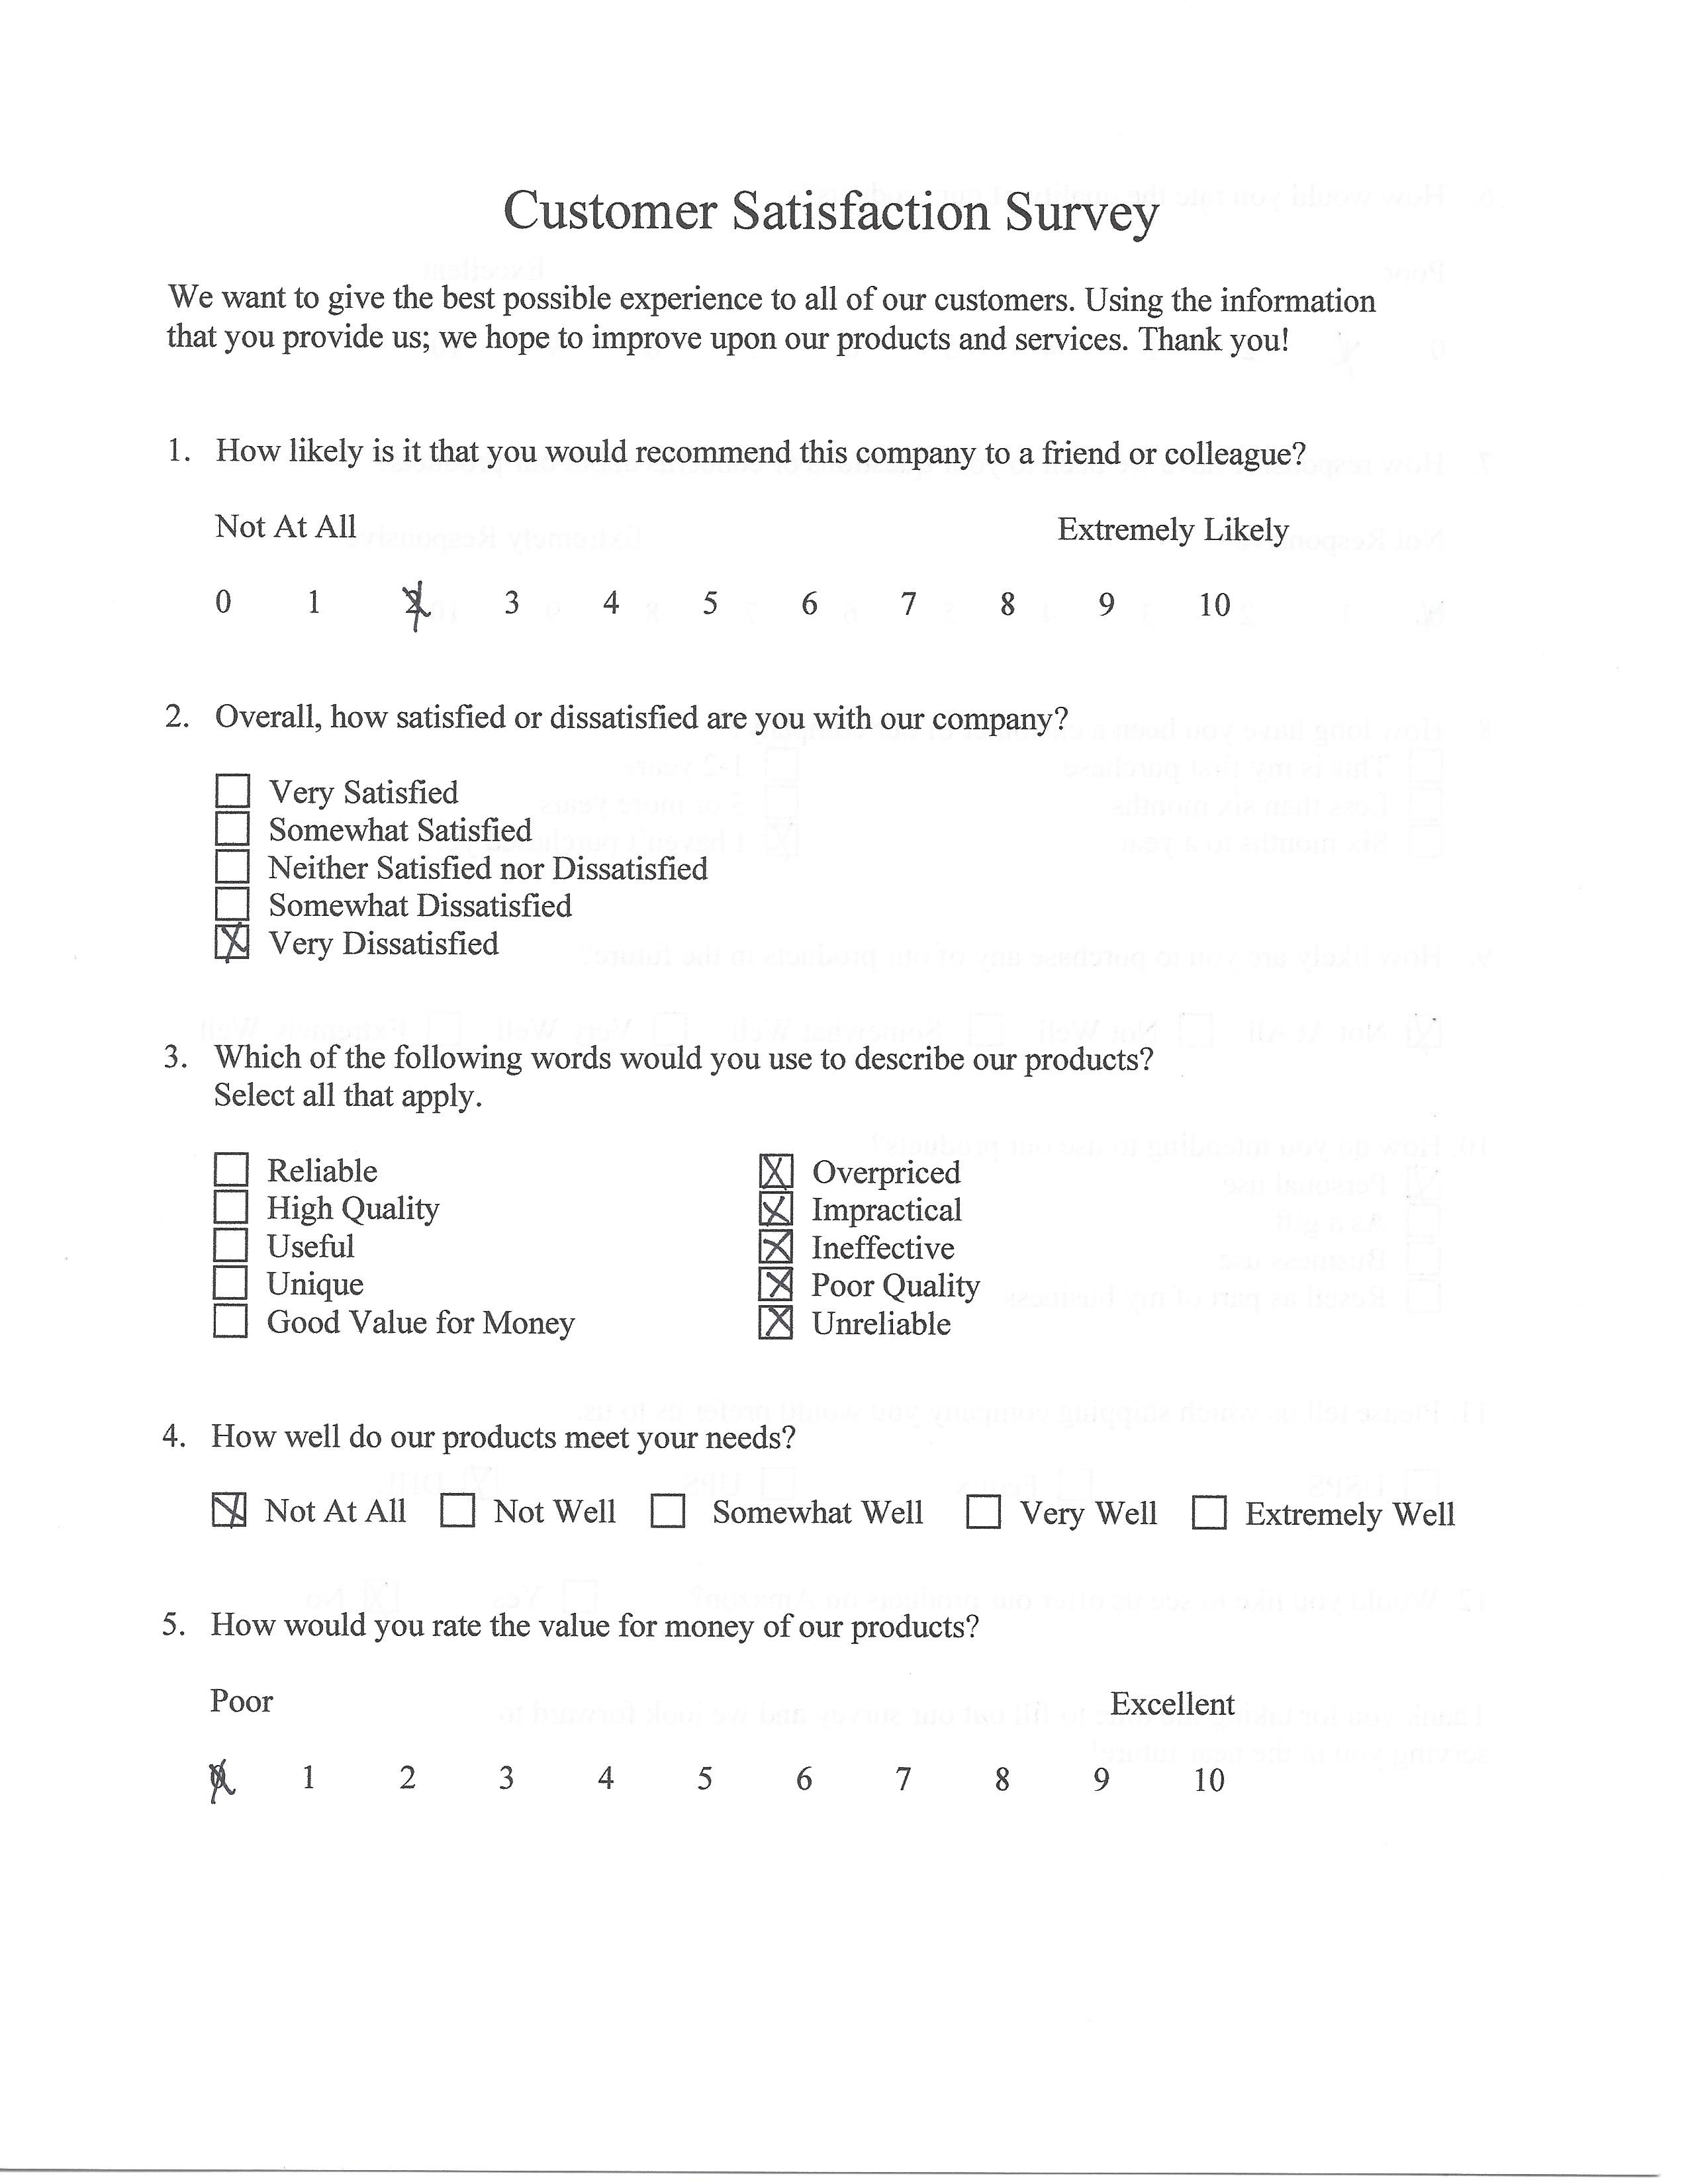

In [93]:
dis(filename=pdf_list[0])

In [36]:
[str(i) + ' ' + c for i,c in enumerate(blank_text1)]

['0 Customer Satisfaction Survey',
 '1 We want to give the best possible experience to all of our customers. Using the information',
 '2 that you provide us; we hope to improve upon our products and services. Thank you!',
 '3 1. How likely is it that you would recommend this company to a friend or colleague?',
 '4 Not At All Extremely Likely',
 '5 0 1 2 3 4 5 6 7 8 9 10',
 '6 2. Overall, how satisfied or dissatisfied are you with our company?',
 '7 [-] Very Satisfied',
 '8 [_] Somewhat Satisfied',
 '9 [_] Neither Satisfied nor Dissatisfied',
 '10 [-] Somewhat Dissatisfied',
 '11 [_] Very Dissatisfied',
 '12 3. Which of the following words would you use to describe our products?',
 '13 Select all that apply.',
 '14 [| Reliable [_] Overpriced',
 '15 [_] High Quality [_] Impractical',
 '16 ["] Useful [] Ineffective',
 '17 [ ] Unique [-] Poor Quality',
 '18 [_] Good Value for Money [-] Unreliable',
 '19 4. How well do our products meet your needs?',
 '20 [-] Not At All [-] Not Well [-] Som

Page 1

5 - likert scale
[7:12] single Boxes 
[14:19] 2 Boxes
20 - 5 Boxes
23 - likert scale

In [37]:
q3 = " ".join(blank_text1[14:19]).replace("[","::[").split('::')
q3 = q3[1:]
q4 = blank_text1[20]
q5 = blank_text1[23]

In [38]:
answer_boxes = {
    'Q1'  : blank_text1[5],
    'Q2.1': blank_text1[7],
    'Q2.2': blank_text1[8],
    'Q2.3': blank_text1[9],
    'Q2.4': blank_text1[10],
    'Q2.5': blank_text1[11],
    'Q3.1': q3[0],
    'Q3.2': q3[1],
    'Q3.3': q3[2],
    'Q3.4': q3[3],
    'Q3.5': q3[4],
    'Q3.6': q3[5],
    'Q3.7': q3[6],
    'Q3.8': q3[7],
    'Q3.9': q3[8],
    'Q3.10': q3[9],
    'Q4': q4,
    'Q5': q5    
}

In [41]:
from pprint import pprint

In [42]:
pprint(answer_boxes, indent=4)

{   'Q1': '0 1 2 3 4 5 6 7 8 9 10',
    'Q2.1': '[_] Very Satisfied',
    'Q2.2': '[_] Somewhat Satisfied',
    'Q2.3': '[_] Neither Satisfied nor Dissatisfied',
    'Q2.4': '[_] Somewhat Dissatisfied',
    'Q2.5': '[_] Very Dissatisfied',
    'Q3.1': '[_] Reliable ',
    'Q3.10': '[_] Unreliable',
    'Q3.2': '[_] Overpriced ',
    'Q3.3': '[_] High Quality ',
    'Q3.4': '[_] Impractical ',
    'Q3.5': '[_] Useful ',
    'Q3.6': '[_] Ineffective ',
    'Q3.7': '[_] Unique ',
    'Q3.8': '[_] Poor Quality ',
    'Q3.9': '[_] Good Value for Money ',
    'Q4': '[_] Not At All [_] Not Well [_] Somewhat Well [_] Very Well [_] '
          'Extremely Well',
    'Q5': '0 1 2 3 4 5 6 7 8 9 10'}


In [39]:
answer_boxes['Q2.1'] = answer_boxes['Q2.1'].replace('[-]','[_]')
answer_boxes['Q2.4'] = answer_boxes['Q2.4'].replace('[-]','[_]')
answer_boxes['Q3.1'] = answer_boxes['Q3.1'].replace('|','_]')
answer_boxes['Q3.1'] = answer_boxes['Q3.1'].replace('|','_]')
answer_boxes['Q3.5'] = answer_boxes['Q3.5'].replace('"','_')
answer_boxes['Q3.5'] = answer_boxes['Q3.5'].replace('[-]','[_]')
answer_boxes['Q3.6'] = answer_boxes['Q3.6'].replace('[]','[_]')
answer_boxes['Q3.7'] = answer_boxes['Q3.7'].replace('[ ]','[_]')
answer_boxes['Q3.8'] = answer_boxes['Q3.8'].replace('[-]','[_]')
answer_boxes['Q3.10'] = answer_boxes['Q3.10'].replace('[-]','[_]')
answer_boxes['Q4'] = answer_boxes['Q4'].replace('[ ]','[_]')
answer_boxes['Q4'] = answer_boxes['Q4'].replace('[-]','[_]')


In [41]:
#test replace answer_box
# for char, replacement in answer_boxes.items():
#       replacement = replacement.replace('[]','[_]').replace('[ ]','[_]').replace('"','_').replace('|','_')

In [40]:
pprint(answer_boxes, indent=4)

Pretty printing has been turned OFF


In [61]:
set(blank_text1[5]) - set(complete_0[5])

{'2'}

In [83]:
def checkLine23(inputlist):
    if inputlist != 'Poor Excellent':
        return inputlist[-1]
    else:
        return inputlist[23]

In [103]:
def likert_diff(str1, str2):
    A = set(str1)
    B = set(str2)
    l_diff = A.symmetric_difference(B)
    num = [x for x in l_diff if x.isdigit]
    return num

In [43]:
import difflib
test_diff = difflib.context_diff(blank_text1, complete_0)


In [47]:
blank_text1[3]

'1. How likely is it that you would recommend this company to a friend or colleague?'

In [56]:
for i,line in enumerate(complete_0):
    print(i,line)

0 Customer Satisfaction Survey
1 We want to give the best possible experience to all of our customers. Using the information
2 that you provide us; we hope to improve upon our products and services. Thank you!
3 1. How likely is it that you would recommend this company to a friend or colleague?
4 Not At All Extremely Likely
5 oO 1 4% 3 4 5 6 7 8 9 10
6 2. Overall, how satisfied or dissatisfied are you with our company?
7 [_] Very Satisfied
8 [_] Somewhat Satisfied
9 [_] Neither Satisfied nor Dissatisfied
10 = Somewhat Dissatisfied
11 Wh
12 Very Dissatisfied
13 3. ich of the following words would you use to describe our products?
14 Select all that apply.
15 [_] Reliable [X] Overpriced
16 [_] High Quality 4] Impractical
17 [ ] Useful Ineffective
18 [-] Unique Poor Quality
19 [_] Good Value for Money [X] Unreliable
20 4. How well do our products meet your needs?
21 NJ Not At All [[] Not Well [] Somewhat Well [[] Very Well [[] Extremely Well
22 5. How would you rate the value for money of

In [74]:
def returnTest(x):
    clean = []
    for line in x:
        y = line.replace('-','_').replace('[]','[_]').replace('|','_]').replace('["]','[_]').replace('[ ]','[_]')
        clean.append(y)
    return clean

In [75]:
comp_test_line = returnTest(blank_text1)

In [76]:
comp_test_line

['Customer Satisfaction Survey', 'We want to give the best possible experience to all of our customers. Using the information', 'that you provide us; we hope to improve upon our products and services. Thank you!', '1. How likely is it that you would recommend this company to a friend or colleague?', 'Not At All Extremely Likely', '0 1 2 3 4 5 6 7 8 9 10', '2. Overall, how satisfied or dissatisfied are you with our company?', '[_] Very Satisfied', '[_] Somewhat Satisfied', '[_] Neither Satisfied nor Dissatisfied', '[_] Somewhat Dissatisfied', '[_] Very Dissatisfied', '3. Which of the following words would you use to describe our products?', 'Select all that apply.', '[_] Reliable [_] Overpriced', '[_] High Quality [_] Impractical', '[_] Useful [_] Ineffective', '[_] Unique [_] Poor Quality', '[_] Good Value for Money [_] Unreliable', '4. How well do our products meet your needs?', '[_] Not At All [_] Not Well [_] Somewhat Well [_] Very Well [_] Extremely Well', '5. How would you rate th

In [77]:
blank_test_line = returnTest(complete_0)

In [78]:
blank_test_line

['Customer Satisfaction Survey', 'We want to give the best possible experience to all of our customers. Using the information', 'that you provide us; we hope to improve upon our products and services. Thank you!', '1. How likely is it that you would recommend this company to a friend or colleague?', 'Not At All Extremely Likely', 'oO 1 4% 3 4 5 6 7 8 9 10', '2. Overall, how satisfied or dissatisfied are you with our company?', '[_] Very Satisfied', '[_] Somewhat Satisfied', '[_] Neither Satisfied nor Dissatisfied', '= Somewhat Dissatisfied', 'Wh', 'Very Dissatisfied', '3. ich of the following words would you use to describe our products?', 'Select all that apply.', '[_] Reliable [X] Overpriced', '[_] High Quality 4] Impractical', '[_] Useful Ineffective', '[_] Unique Poor Quality', '[_] Good Value for Money [X] Unreliable', '4. How well do our products meet your needs?', 'NJ Not At All [[_] Not Well [_] Somewhat Well [[_] Very Well [[_] Extremely Well', '5. How would you rate the value

In [79]:
diff = difflib.context_diff(comp_test_line, blank_test_line, tofile='DifferenceTestFile.txt')

In [84]:
difference = difflib.HtmlDiff().make_file(blank_test_line,comp_test_line,blank_text1, complete_0)

In [87]:
with open("different.html",'w') as f:
    f.write(difference)
